# Basic pytorch stuff

In [1]:
!jupytext --to markdown "Basic pytorch.ipynb"

[jupytext] Reading Basic pytorch.ipynb
[jupytext] Writing Basic pytorch.md (destination file replaced)


In [2]:
import numpy as np
import torch
import torch.nn as nn

## Make a 3d tensor 
pay attention that torch.int = int32 and simple int = int64

In [3]:
y = torch.tensor([
     [[1, 2, 3],
      [4, 5, 6]],
     [[1, 2, 3],
      [4, 5, 6]],
     [[1, 2, 3],
      [4, 5, 6]]], 
    dtype = torch.int)
print(y, "\n\n", y.shape)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]], dtype=torch.int32) 

 torch.Size([3, 2, 3])


## Making summation over different dimentions 

In [4]:
y.sum(dim=0)

tensor([[ 3,  6,  9],
        [12, 15, 18]])

In [5]:
y.sum(dim=1)

tensor([[5, 7, 9],
        [5, 7, 9],
        [5, 7, 9]])

In [6]:
y.sum(dim=2)

tensor([[ 6, 15],
        [ 6, 15],
        [ 6, 15]])

## Float tensors

In [7]:
x = torch.FloatTensor(2,3)
print(x, x.dtype)

tensor([[3.6011e-38, 4.5866e-41, 1.3215e-12],
        [3.0663e-41, 1.4013e-45, 4.5866e-41]]) torch.float32


In [8]:
np_array = np.random.random((2,3)).astype(float)
np_array

array([[0.68070255, 0.61317935, 0.75916742],
       [0.14941783, 0.34229245, 0.91174874]])

In [9]:
x1 = torch.FloatTensor(np_array)
x2 = torch.randn(2,3)
print(x1, x1.dtype, "\n\n",x2, x2.dtype)

tensor([[0.6807, 0.6132, 0.7592],
        [0.1494, 0.3423, 0.9117]]) torch.float32 

 tensor([[-0.9780,  0.0616, -0.0514],
        [ 1.3100,  0.6309,  0.2642]]) torch.float32


## Integer tensors

In [10]:
int_tensor = torch.arange(4, dtype=torch.int)
int_tensor, int_tensor.dtype

(tensor([0, 1, 2, 3], dtype=torch.int32), torch.int32)

In [11]:
int_tensor.view(2,2)

tensor([[0, 1],
        [2, 3]], dtype=torch.int32)

In [12]:
torch.sum(y, dtype=torch.int)

tensor(63, dtype=torch.int32)

In [13]:
e = torch.exp(int_tensor.float())
e

tensor([ 1.0000,  2.7183,  7.3891, 20.0855])

In [16]:
int_tensor*e

tensor([ 0.0000,  2.7183, 14.7781, 60.2566])

## Matmul and MM plus devices

In [28]:
torch.matmul(x1, x2.t())

tensor([[-0.6670,  1.4792],
        [-0.1720,  0.6526]])

In [22]:
torch.matmul(x1, x2.t())

tensor([[-0.6670,  1.4792],
        [-0.1720,  0.6526]])

In [23]:
np.matmul(x1.numpy(), x2.t().numpy())

array([[-0.66702986,  1.4791664 ],
       [-0.1719538 ,  0.6526077 ]], dtype=float32)

In [34]:
torch.matmul(x1.to(torch.float64), x2.to(torch.float64).t())

tensor([[-0.6670,  1.4792],
        [-0.1720,  0.6526]], dtype=torch.float64)

In [37]:
device=torch.device('cuda')
x1 = x1.to(device)
x1.get_device()

0

In [53]:
x = torch.randn(3,2)
x

tensor([[-0.3395,  0.7248],
        [-1.6600, -0.0285],
        [-0.3693, -1.8319]])

In [51]:
try:
    x.to(device).numpy()
except RuntimeError as e:
    print(e)
except Exception as e:
    print(e)
finally:
    print('OK')

can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
OK


In [57]:
torch.mm(torch.ones(2,3), torch.ones(3))

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [58]:
torch.matmul(torch.ones(2,3), torch.ones(3))

tensor([3., 3.])

## A bit of autograd

In [73]:
x = torch.arange(0,4).float().requires_grad_(True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [74]:
y = x**2

In [75]:
y.sum()

tensor(14., grad_fn=<SumBackward0>)

In [77]:
y.sum().backward()

In [78]:
x.grad

tensor([0., 2., 4., 6.])

In [158]:
net = torch.nn.Linear(4,2)

In [159]:
net

Linear(in_features=4, out_features=2, bias=True)

In [163]:
f = torch.arange(0,4).float()
f

tensor([0., 1., 2., 3.])

In [161]:
y = net(f)

In [162]:
y

tensor([-0.6486, -0.9467], grad_fn=<AddBackward0>)

In [164]:
for param in net.parameters():
    print (param)

Parameter containing:
tensor([[ 0.0062, -0.0700,  0.2314, -0.3623],
        [ 0.2912, -0.1247, -0.1449, -0.1122]], requires_grad=True)
Parameter containing:
tensor([ 0.0457, -0.1956], requires_grad=True)


##  Моя первая нейронная сетка

In [ ]:
help(torch.nn.Module)

In [214]:
class MyNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size,2)
        self.layer3 = torch.nn.Sigmoid()
        
    def forward(self, input_val):
        h = input_val
        h = self.layer1(h)
        h = self.layer2(h)
        h = self.layer3(h)
        return h
    
    def print_params(self):
        for item in self.parameters():
            print(item)

In [220]:
net = MyNet(4,16)

In [216]:
net.print_params()

Parameter containing:
tensor([[ 0.1714,  0.0054,  0.0135,  0.2375],
        [-0.2734, -0.2523,  0.1203, -0.0256],
        [-0.0172, -0.2048, -0.4937, -0.2385],
        [ 0.2607,  0.0676, -0.1736, -0.2190],
        [ 0.2596,  0.0793,  0.3028, -0.4382],
        [-0.0682, -0.4884, -0.2896,  0.1911],
        [-0.2250, -0.1496,  0.0766,  0.4946],
        [-0.2225, -0.4926, -0.1673, -0.3859],
        [ 0.4157,  0.4976, -0.1205,  0.3753],
        [-0.4672, -0.2079, -0.4549,  0.0241],
        [ 0.4097,  0.2128, -0.2531,  0.2228],
        [-0.3411, -0.2235,  0.2279, -0.2119],
        [-0.2136, -0.2691, -0.2938,  0.4035],
        [-0.1405, -0.0119,  0.4893, -0.2947],
        [-0.3604,  0.1100,  0.1278, -0.1234],
        [-0.3834, -0.2455,  0.1176, -0.1726]], requires_grad=True)
Parameter containing:
tensor([ 2.6076e-01,  1.3226e-01,  1.7381e-04,  4.2966e-01, -1.0452e-01,
        -5.2752e-02, -2.0049e-01, -9.8614e-02, -2.1173e-01,  4.5403e-01,
         8.6372e-02, -3.6805e-01,  6.7845e-02,  1.451

In [221]:
net.forward(torch.rand(4))

tensor([0.5246, 0.5869], grad_fn=<SigmoidBackward>)

In [254]:
class MyNet2(torch.nn.Sequential):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__(nn.Linear(input_size, hidden_size), 
                         nn.Linear(hidden_size, output_size), 
                         nn.Softmax())
    def print_params(self):
        for item in self.parameters():
            print(item)

In [242]:
def make_net2(input_size, hidden_size, output_size):
    return nn.Sequential(nn.Linear(input_size, hidden_size), 
                             nn.Linear(hidden_size, output_size), 
                             nn.Sigmoid())

In [255]:
ttt = MyNet2(4,16, 10)

In [243]:
net2 = make_net2(4,16,10)

In [244]:
net2.forward(torch.ones(4))

tensor([0.6007, 0.7096, 0.7543, 0.5361, 0.4564, 0.5808, 0.4171, 0.4801, 0.3513,
        0.5427], grad_fn=<SigmoidBackward>)

In [ ]:
net2

In [256]:
ttt.forward(torch.ones(4))

/usr/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([0.1123, 0.2141, 0.0880, 0.0594, 0.0878, 0.0930, 0.0576, 0.0825, 0.1199,
        0.0856], grad_fn=<SoftmaxBackward>)

In [257]:
ttt.print_params()

Parameter containing:
tensor([[ 0.1373,  0.2929,  0.2541, -0.0555],
        [-0.1513,  0.3345, -0.1255, -0.2897],
        [-0.1781, -0.4404, -0.4254, -0.0877],
        [-0.4260,  0.4384,  0.1961, -0.4451],
        [ 0.4116,  0.2819, -0.1327, -0.0184],
        [-0.0227, -0.1085, -0.1410,  0.0528],
        [ 0.1697,  0.2691, -0.0950, -0.4855],
        [-0.4631, -0.1972, -0.0513,  0.3360],
        [ 0.1719, -0.4612, -0.1836, -0.4056],
        [ 0.0106,  0.0285,  0.1324, -0.2354],
        [-0.0161,  0.3861, -0.1371,  0.0623],
        [ 0.1441,  0.3036, -0.0753,  0.0216],
        [ 0.4255, -0.1737,  0.2636,  0.4485],
        [-0.0294, -0.4045,  0.3832,  0.0756],
        [ 0.1896,  0.4565,  0.0278, -0.4594],
        [-0.1792,  0.3235, -0.1605, -0.1490]], requires_grad=True)
Parameter containing:
tensor([ 0.0562,  0.2413,  0.3477,  0.1714,  0.3858, -0.0527,  0.3031, -0.3139,
        -0.0870, -0.0347,  0.3929, -0.3392, -0.4987, -0.0069,  0.2188, -0.2879],
       requires_grad=True)
Parameter c

In [169]:
import matplotlib.pyplot as plt

In [170]:
%matplotlib inline

In [184]:
x = np.arange(-100,100,0.5)
above_zero = (x >=0).astype(int)
below_zero = (x<0).astype(int)

In [193]:
y =  x*above_zero + 0.5*below_zero*x

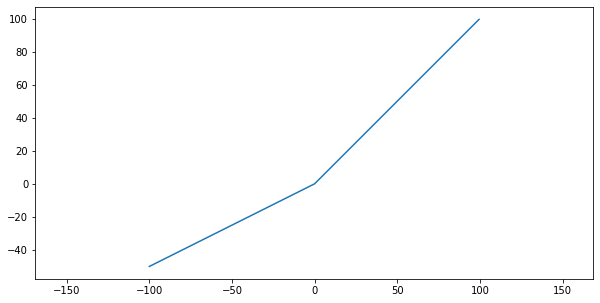

In [200]:
plt.figure(figsize=(10,5))
plt.axis('equal')
plt.plot(x,y)
plt.show()

In [ ]:
lin = nn.Linear(4)

In [3]:
target = torch.ones([10, 64], dtype=torch.float32)  # 64 classes, batch size = 10

In [4]:
output = torch.full([10, 64], 0.999)  # A prediction (logit)
pos_weight = torch.ones([64])  # All weights are equal to 1
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
criterion(output, target)  # -log(sigmoid(0.999))

tensor(0.3135)

In [7]:
output

tensor([[0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990],
        [0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990, 0.9990,
         0

In [6]:
target

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1.,